
**Algo4DS Assignment2**
* Name : Priyanka Nigade
* University Id : U01819760

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from numpy.random import randint
from math import *
from decimal import Decimal
from scipy.spatial import distance

In [2]:
# Load data from textfile

path = 'iris.data'
df = pd.read_csv(path, sep = ',')
df.shape

(150, 5)

In [3]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Convert string column to float
for col in df.columns:
    if col != 'class':
        df[col] = pd.to_numeric(df[col], downcast='float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float32
 1   sepal width   150 non-null    float32
 2   petal length  150 non-null    float32
 3   petal width   150 non-null    float32
 4   class         150 non-null    object 
dtypes: float32(4), object(1)
memory usage: 3.6+ KB


### Divide 20/30 (instances of esch class) Train and Test set

In [8]:
df1 = df

In [9]:
# get the first 20 instances and combine them to create train/reference dataset

df_iris_setosa = df1[df1['class'] == 'Iris-setosa'][:20]
df_iris_versicolor = df1[df1['class'] == 'Iris-versicolor'][:20]
df_iris_virginica = df1[df1['class'] == 'Iris-virginica'][:20]

train_set = pd.concat([df_iris_setosa, df_iris_versicolor, df_iris_virginica])

In [10]:
train_set

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
# get the first 30 instances and combine them to create test dataset

df_iris_setosa = df1[df1['class'] == 'Iris-setosa'][20:50]
df_iris_versicolor = df1[df1['class'] == 'Iris-versicolor'][20:50]
df_iris_virginica = df1[df1['class'] == 'Iris-virginica'][20:50]

test_set = pd.concat([df_iris_setosa, df_iris_versicolor, df_iris_virginica])

In [12]:
test_set

,sepal length,sepal width,petal length,petal width,class
20,5.4,3.4,1.7,0.2,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [14]:
#create function to calculate Manhattan distance 
def manhattan_distance(a, b):
    distance = 0.0

    for i in range(len(a)-1):
        distance += abs(a[i] - b[i])
    
    return distance 

In [15]:
# Function distance between two points

def p_root(value, root):
     
    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3)

In [16]:
#create function to calculate minkowski distance 

def minkowski_distance(x, y, p_value):
   
    # pass the p_root function to calculate
    # all the value of vector parallelly
    return (p_root(sum(pow(abs(a-b), p_value)
            for a, b in zip(x, y)), p_value))


In [17]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, k_neighbors, distancemethod, p, power):
    distances = list()
    weighted_distance = list()
       
    #remove class from test set row
    test_row.pop()
    for train_row in train:
        if(distancemethod == 'euclidean'):
            dist = euclidean_distance(test_row, train_row)
            distances.append((train_row, dist))
            
        elif(distancemethod == 'manhattan'):
            
            dist = manhattan_distance(test_row, train_row)
            distances.append((train_row, dist))
            
        elif(distancemethod == 'minkowski'):           
            # p value needed
            train_row_new = train_row[:-1]
            dist = minkowski_distance(test_row, train_row_new, p)
            
            #Library function does not accept .5 value
            #dist = distance.minkowski(test_row, train_row_new, p)
            distances.append((train_row, dist))
            
        else:
            print('Please provide valid method to calculate distance')

    # sort the distances
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    class_values = list()
    #distances1 = distances

    if(power == 0):
        for i in range(k_neighbors):
            neighbors.append(distances[i][0])
    else:
        for i in range(k_neighbors):
            # ckeck if distance is 0 to avoid divide by 0 error
            if distances[i][1]** power == 0:
                weighted_distance.append((distances[i][0],0))                               
                
            else:
                weighted_distance.append((distances[i][0], 1/ ((distances[i][1])** power)))
                
            class_values.append(distances[i][0][4])
            
        class_values = set(class_values)      
        final_weight_class = list()

        #Get the sum of weighted distance for each class
        for val in class_values:
            sum = 0
            for value in weighted_distance: 
                
                clas = value[0][4]
                if val == clas:
                    sum += value[1]
            
            final_weight_class.append((val, sum)) 
        
        #sort the added distances
        final_weight_class.sort(key=lambda tup: tup[1]) 
        
        # Return class with min distance
        neighbors.append(final_weight_class[0][0])
        
    return neighbors

In [18]:

# Make a prediction with neighbors
def predict_classification(train, test_row, k_neighbors, distancemethod, p, power):
    neighbors = get_neighbors(train, test_row, k_neighbors, distancemethod, p, power)
    
    if power <= 0:
        output_values = [row[-1] for row in neighbors]
    
        #print('output_values', output_values)
        #from list of class values in the neighbors, the max() function takes a set of unique class values 
        #and calls the count on the list of class values for each class value in the set.
        # works same as voting class with min distance
        prediction = max(set(output_values), key=output_values.count)
        
    else:
        prediction = neighbors[0]
            
    return prediction

In [19]:
# kNN Algorithm
# Parameters 
    # train is the train dataset
    # test is the test dataset
    # k_neighbors = no. of numbers need to find out
    # distancemethod = method for distance calculation
    # p for minkowski distance calculations
    # power for weighted distance KNN
    
def get_nearest_neighbors_predictions(train, test, k_neighbors, distancemethod, p = 0, power = 0):
    if 'predicted' in test.columns:
        test = test.drop(['predicted'], axis = 1)
        
    predictions = list()
    
    train_list = train.values.tolist()
    test_list = test.values.tolist()

    for row in test_list:
        output = predict_classification(train_list, row, k_neighbors, distancemethod, p, power)
        predictions.append(output)
    return(predictions)


In [20]:
def find_error(test_set, predictions):
        
    test_set_predictions = test_set
    test_set_predictions['predicted'] = predictions
    accuracy= (len(test_set_predictions[test_set_predictions['class'] == test_set_predictions['predicted']])/len(test_set))* 100.0 
    error= (len(test_set_predictions[test_set_predictions['class'] != test_set_predictions['predicted']])/len(test_set))* 100.0
    print('=============================================')
    print('KNN Algorithm Performance')
    print('=============================================')
    print('Percentage Accuracy :', accuracy)
    print('Percentage Error    :', error)
    
    
    

In [21]:
def calculate_error(test_set, predictions, p):
        
    test_set_predictions = test_set
    test_set_predictions['predicted'] = predictions
    accuracy= (len(test_set_predictions[test_set_predictions['class'] == test_set_predictions['predicted']])/len(test_set))* 100.0 
    error= (len(test_set_predictions[test_set_predictions['class'] != test_set_predictions['predicted']])/len(test_set))* 100.0
    print('=============================================')
    print('KNN Algorithm Performance')
    print('=============================================')
    print('P value :', p)
    
    print('Percentage Accuracy :', accuracy)
    print('Percentage Error    :', error)
    
    return error

#### Q 1. Find the number of errors of the nearest neighbor classifier. <br>
NN-classifier(q, R) = t(argmind(q, r))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;r∈R


In [22]:
predictions= get_nearest_neighbors_predictions(train_set, test_set, k_neighbors=1, distancemethod ='euclidean')

In [23]:
find_error(test_set, predictions)

KNN Algorithm Performance
Percentage Accuracy : 92.22222222222223
Percentage Error    : 7.777777777777778


#### Q 2. Find the number of errors of the (k = 3)-NN classifier.

In [24]:
predictions= get_nearest_neighbors_predictions(train_set, test_set,k_neighbors= 3, distancemethod ='euclidean')

In [25]:
find_error(test_set, predictions)

KNN Algorithm Performance
Percentage Accuracy : 93.33333333333333
Percentage Error    : 6.666666666666667


#### Q 3. Find the number of errors of the (k = 5)-NN classifier.

In [26]:
predictions= get_nearest_neighbors_predictions(train_set, test_set, k_neighbors=5, distancemethod ='euclidean')

In [27]:
find_error(test_set, predictions)

KNN Algorithm Performance
Percentage Accuracy : 95.55555555555556
Percentage Error    : 4.444444444444445


#### Q 4. Find the number of errors of the (k = 3)-NN classifier where Manhattan L1 distance is used instead of L2.

In [28]:
predictions= get_nearest_neighbors_predictions(train_set, test_set, k_neighbors=3, distancemethod = 'manhattan')

In [29]:
find_error(test_set, predictions)

KNN Algorithm Performance
Percentage Accuracy : 93.33333333333333
Percentage Error    : 6.666666666666667


#### Q 5. Find the number of errors of the (p = 1) distance weighted (k = 5)-NN classifier.

In [30]:
predictions = get_nearest_neighbors_predictions(train_set, test_set, 
                                                k_neighbors=5, distancemethod = 'euclidean', p=0, power =1)


In [31]:
find_error(test_set, predictions)

KNN Algorithm Performance
Percentage Accuracy : 86.66666666666667
Percentage Error    : 13.333333333333334


#### Q 6. Find the number of errors of the (p = 2) distance weighted (k = 5)-NN classifier

In [32]:
predictions = get_nearest_neighbors_predictions(train_set, test_set, 
                                               k_neighbors=5, distancemethod = 'euclidean', p=0, power=2)

In [33]:
find_error(test_set, predictions)

KNN Algorithm Performance
Percentage Accuracy : 86.66666666666667
Percentage Error    : 13.333333333333334


#### Q 9. Find the normalized vectors for the first instance of each class.
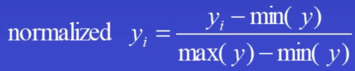



In [34]:
test_set = test_set.drop(['predicted'], axis =1)
train_set_normalized = train_set.copy()
test_set_normalized = test_set.copy()

In [35]:
#test_set_normalized

In [36]:
# find the min max of the column
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [37]:
# normalize the values
for col in train_set_normalized.columns:
    if col != 'class':
        train_set_normalized[col] = min_max_scaling(train_set_normalized[col])


In [38]:
for col in test_set_normalized.columns:
    if col != 'class':
        test_set_normalized[col] = min_max_scaling(test_set_normalized[col])


In [39]:
test_set_normalized

,sepal length,sepal width,petal length,petal width,class
20,0.285714,0.578947,0.122807,0.041667,Iris-setosa
21,0.200000,0.736842,0.087719,0.125000,Iris-setosa
22,0.057143,0.684211,0.000000,0.041667,Iris-setosa
23,0.200000,0.526316,0.122807,0.166667,Iris-setosa
24,0.114286,0.578947,0.157895,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.657143,0.368421,0.736842,0.916667,Iris-virginica
146,0.542857,0.105263,0.701754,0.750000,Iris-virginica
147,0.600000,0.368421,0.736842,0.791667,Iris-virginica
148,0.514286,0.578947,0.771930,0.916667,Iris-virginica


In [40]:
#test_set

#### Q 10. Find the number of errors of the nearest neighbor classifier if Euclidean L2 distance is used.

In [41]:
predictions = get_nearest_neighbors_predictions(train_set_normalized, test_set_normalized, 
                                               k_neighbors=1, distancemethod ='euclidean')


In [42]:
find_error(test_set_normalized, predictions)

KNN Algorithm Performance
Percentage Accuracy : 94.44444444444444
Percentage Error    : 5.555555555555555


#### Q 11. Find the p value that gives the least error rate of the nearest neighbor classifier when Minkowski Lp is used. Try p = 0.5 ∼ 2.5 incremented by 0.1.

In [43]:
p = 0.5
p_val_error = list()

while p < 2.6:
    predictions = get_nearest_neighbors_predictions(train_set_normalized, test_set_normalized, 
                                               k_neighbors=1, distancemethod ='minkowski', p = p)
    error_val = calculate_error(test_set_normalized, predictions, p)
    p_val_error.append((p, error_val))
    p = p+0.1
    
p_val_error.sort(key=lambda tup: tup[1])

print('\n\n=============================================')
print('Best p value:', p_val_error[0][0])
print('Min error for best p value:', p_val_error[0][1])
print('=============================================')


KNN Algorithm Performance
P value : 0.5
Percentage Accuracy : 95.55555555555556
Percentage Error    : 4.444444444444445
KNN Algorithm Performance
P value : 0.6
Percentage Accuracy : 95.55555555555556
Percentage Error    : 4.444444444444445
KNN Algorithm Performance
P value : 0.7
Percentage Accuracy : 95.55555555555556
Percentage Error    : 4.444444444444445
KNN Algorithm Performance
P value : 0.7999999999999999
Percentage Accuracy : 95.55555555555556
Percentage Error    : 4.444444444444445
KNN Algorithm Performance
P value : 0.8999999999999999
Percentage Accuracy : 95.55555555555556
Percentage Error    : 4.444444444444445
KNN Algorithm Performance
P value : 0.9999999999999999
Percentage Accuracy : 94.44444444444444
Percentage Error    : 5.555555555555555
KNN Algorithm Performance
P value : 1.0999999999999999
Percentage Accuracy : 94.44444444444444
Percentage Error    : 5.555555555555555
KNN Algorithm Performance
P value : 1.2
Percentage Accuracy : 94.44444444444444
Percentage Error    

#### Q 12. Find the number of errors of the (k = 3)-NN classifier if Euclidean L2 distance is used.

In [44]:
predictions= get_nearest_neighbors_predictions(train_set_normalized, test_set_normalized, 
                                               k_neighbors=3, distancemethod = 'euclidean')

In [45]:
find_error(test_set_normalized, predictions)

KNN Algorithm Performance
Percentage Accuracy : 93.33333333333333
Percentage Error    : 6.666666666666667


#### Q 13. Find the number of errors of the (k = 5)-NN classifier if Euclidean L2 distance is used.

In [46]:
predictions= get_nearest_neighbors_predictions(train_set_normalized, test_set_normalized, 
                                               k_neighbors=5, distancemethod = 'euclidean')

In [47]:
find_error(test_set_normalized, predictions)

KNN Algorithm Performance
Percentage Accuracy : 92.22222222222223
Percentage Error    : 7.777777777777778


#### Q 14. Find the number of errors of the (p = 1) distance weighted (k = 5)-NN classifier if Euclidean L2 distance is used.


In [48]:
predictions= get_nearest_neighbors_predictions(train_set_normalized, test_set_normalized, 
                                               k_neighbors=5, distancemethod = 'euclidean', p=0, power=1)

In [49]:
find_error(test_set_normalized, predictions)

KNN Algorithm Performance
Percentage Accuracy : 71.11111111111111
Percentage Error    : 28.888888888888886


#### Q 15. Find the number of errors of the (p = 2) distance weighted (k = 5)-NN classifier if Euclidean L2 distance is used.

In [50]:
predictions= get_nearest_neighbors_predictions(train_set_normalized, test_set_normalized, 
                                               k_neighbors=5, distancemethod = 'euclidean', p=0, power=2)

In [51]:
find_error(test_set_normalized, predictions)

KNN Algorithm Performance
Percentage Accuracy : 71.11111111111111
Percentage Error    : 28.888888888888886


In [52]:
predictions= get_nearest_neighbors_predictions(train_set_normalized, test_set_normalized, 
                                               k_neighbors=5, distancemethod = 'euclidean', p=0, power=2.5)

In [53]:
find_error(test_set_normalized, predictions)

KNN Algorithm Performance
Percentage Accuracy : 71.11111111111111
Percentage Error    : 28.888888888888886
